In [72]:
import pandas as pd

In [73]:
data=pd.read_csv('CoronaVirusTweets.csv',encoding='latin-1')

In [74]:
data.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1.250000e+18,7.670000e+17,2020-04-01T00:06:29Z,prabhatVKN,"Online training for 25,000 doctors to begin ht...",Twitter for iPad,NaN,NaN,NaN,False,...,0,IN,"Bengaluru, India",city,821,357,NaN,2016-08-20T09:07:21Z,False,en
1,1.250000e+18,9.420000e+17,2020-04-01T00:08:37Z,Amaresh03335514,"#Coronavirus: #WhiteHouse projects 100,000 to ...",Twitter for Android,NaN,NaN,NaN,False,...,1,IN,"Varanasi, India",city,5613,4010,NaN,2017-12-15T11:45:08Z,False,en
2,1.250000e+18,6.150244e+07,2020-04-01T00:28:30Z,sscsoftweb,#Coronavirus | Three quasi-subspecies of virus...,Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Egmore Nungambakkam, India",city,341,1227,NaN,2009-07-30T14:34:33Z,False,en
3,1.250000e+18,6.729092e+07,2020-04-01T00:29:37Z,chhuti_is,My small contribution for the pandemic #covid1...,Twitter for Android,NaN,NaN,NaN,True,...,3,IN,"Bidhan Nagar, India",city,8400,836,NaN,2009-08-20T11:33:48Z,False,en
4,1.250000e+18,8.680000e+17,2020-04-01T00:29:55Z,SabarUmesh,Fourth #COVID19 positive case in Odisha \n\n29...,Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Orissa, India",city,8,81,NaN,2017-05-26T15:12:47Z,False,en


In [75]:
#Function to clean the tweets
import re
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)  #For removing @mentions
    text=re.sub(r'#','',text)              #For removing # symbol
    text=re.sub(r'RT[\s]+','',text)        #For removing ReTweets
    text=re.sub(r'https?:\/\/\$+','',text) #For removing hyperlink
    return text

data['text']=data['text'].apply(cleanTxt)
data.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1.250000e+18,7.670000e+17,2020-04-01T00:06:29Z,prabhatVKN,"Online training for 25,000 doctors to begin ht...",Twitter for iPad,NaN,NaN,NaN,False,...,0,IN,"Bengaluru, India",city,821,357,NaN,2016-08-20T09:07:21Z,False,en
1,1.250000e+18,9.420000e+17,2020-04-01T00:08:37Z,Amaresh03335514,"Coronavirus: WhiteHouse projects 100,000 to 24...",Twitter for Android,NaN,NaN,NaN,False,...,1,IN,"Varanasi, India",city,5613,4010,NaN,2017-12-15T11:45:08Z,False,en
2,1.250000e+18,6.150244e+07,2020-04-01T00:28:30Z,sscsoftweb,Coronavirus | Three quasi-subspecies of virus ...,Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Egmore Nungambakkam, India",city,341,1227,NaN,2009-07-30T14:34:33Z,False,en
3,1.250000e+18,6.729092e+07,2020-04-01T00:29:37Z,chhuti_is,My small contribution for the pandemic covid19...,Twitter for Android,NaN,NaN,NaN,True,...,3,IN,"Bidhan Nagar, India",city,8400,836,NaN,2009-08-20T11:33:48Z,False,en
4,1.250000e+18,8.680000e+17,2020-04-01T00:29:55Z,SabarUmesh,Fourth COVID19 positive case in Odisha \n\n29-...,Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Orissa, India",city,8,81,NaN,2017-05-26T15:12:47Z,False,en


In [76]:
#Sentence Tokenization
import nltk
from nltk.tokenize import sent_tokenize
for i in range(0,len(data)):
  tokenized_text=sent_tokenize(data['text'][i])
  print(tokenized_text)

['Online training for 25,000 doctors to begin https://t.co/nXDWo6iuxy via  digital platform for covid19 training']
['Coronavirus: WhiteHouse projects 100,000 to 240,000 deaths in the US" Coronavirus https://t.co/f9q7bU3pif \nUS COVID19 cases surpassed 175000 with more than 3400 fatalities.']
['Coronavirus | Three quasi-subspecies of virus in circulation in India, says ICMR: https://t.co/pI8he5dOKs']
['My small contribution for the pandemic covid19 to the PMCaresFund .', 'Will urge all to contribute for the noble case and give a helping hand to our lovable PM Narendra_Modi_ji  to fight with Corona .', 'https://t.co/euWbDz5cfC']
['Fourth COVID19 positive case in Odisha \n\n29-year-old male from Bhadrak district with travel history to Dubai tests positive for Coronavirus, informs Odisha Health &amp; Family Welfare department']
['IIT professors modify app to monitor people COVID19']
['From a doctor friend treating COVID19 patients.']
['NizamuddinMarkaz\nTill 31st March\nTotal Positive : 95

["5th April 9PM For 9 Min Let the flame of positivity do it's magic!", 'Stay home, Stay safe!This small gesture can encourage all the healthcare workers, police and others who are frontline soldiers and fighting to save our lives.', 'modi narendramodi covid19 coronavirus india https://t.co/Fg6k4CNRCO']
['Sometimes, Distance is the only way to find peace!\x83?', '?\x8b?\x8f\nCOVID2019 stayhomestaysafe']
['We are all superheroes to save the world you have to do by staying inside home and help the our neighbourhood and societies by not spreading the virus so Avengers Assemble StayHomeStaySafe']
['I will join the nation for the call tonight 9baje9minute appealed by our Hon\x83?', '?ble PM  sir.', 'This will bring our nation united and strengthen the battle against COVID19 \nIndiaFightsCorona .', 'My SandArt installation.', 'https://t.co/FeDHFxmVSl']
["India's first at home testing kit for COVID19 launched \nIndiaFightsCorona\nRead more at https://t.co/pZ5yEChgHy\n\nhttps://t.co/UhIRthpFZN"

["Coronavirus: 'Unity is the only option to defeat this virus,' WHO head says Coronavirus https://t.co/2WGgtrwhnq"]
['Cope with the anxiety, depression and fear of Covid_19 with continuous meditation and UnlockYourInnerPower !', 'As it reduces stress and empowers your mind by connecting it to the soul.', 'You can begin with just 15 minutes each day, and then keep on increasing the time.', 'https://t.co/BUDWKGehPJ']
['Change of pace may do us all some good in unexpected ways.', 'lockdowndays quarantine stayhomestaysafe eldeco CoronaLockdown https://t.co/IJu25r81OK']
['An appeal to Fashiongaze readers amid ChineseVirus (coronavirus) outbreak.', 'STAY HOME STAY SAFE\n.', '.', '.', 'stayhomestaysafe??', '?ú\nfollowtheinstructions\nindiafightschinesevirus chinesevirus fashiongazeappeal\x83??', 'https://t.co/Es9TBKZE3u']
['lockdown my village Daunkalan to save from COVID19 _kaur _amarinder  https://t.co/cNN3T36QMp']
['The biggest advantage the journalist has, is that it can paint Covid19 as 

["Listen to What's Poppin Remix by Sarthak Dev on SoundCloud\nhttps://t.co/ztIiIbjaTI \n\nwhatspoppin jackharlow COVID__19 coronavirus Quarantine rapper BeatSaber Beats remix"]
["World's highest number of new coronavirus cases in the past 24 hours:\n\n1.???§????", '+27,508\n2.???ª????', '+5,233\n3.??????', '?ú    +5,138\n4.???®??', '?ú    +4,785\n5.???¦????', '+4,754\n\nCOVID__19 COVID19Pandemic COVID?\x9f¬19']
['Follow lockdown LockdownExtended\nsabfadejange  __Verma \nStayHomeStaySafe https://t.co/SHHZt5Hoew']
['Weather tracking &amp; understanding has a big role in preventing d spread from COVID__19 COVID19.', '_ahmar    _Xpe    \nhttps://t.co/9HTDszLWn0']
['"WHO" says "no clear evidence of human to human transmission of the novel coronavirus.', 'DATE: JAN 14 2020\n\n  _Nirmalkumar  https://t.co/7tWOstW2Yw']
['Spraying of disinfectants has been started with the help of  Dy.', 'leader &amp; Standing Committee Chairman Shri  ji and Byculla MLA  ji.', 'WarAgainstCoronavirus\nStayHomeSt

['Homemade "designer" facemask with old handloom fabric, paperclip and unwoven polypropylene bag, beautifully created by _mcgill4!!!', 'Covid_19india COVID19 Lockdown2 https://t.co/FlUvkvbRVq']
['IndiaFightsCorona:\n\nPractise frequent hand-washing with soap and water or use an alcohol-based hand sanitizer.', 'Let us fight COVID19 together.', 'Share this information and help us to help you.', 'Lockdown21 CoronaOutbreak\nSwasthaBharat HealthForAll https://t.co/A3dPuGSp73']
['MHA issues guidelines for Lockdown2 after the nationwide lockdown was extended to May 3rd by the Prime Minister .', 'COVID19\nStayHome https://t.co/9X4Ao5bHjt']
['Ministry of Home Affairs (MHA) issues National Directives for COVID19 management.', 'Wearing of face cover is compulsory in all public places, workplaces.', 'Spitting in public places shall be punishable with fine.', 'Covid_19india \nCoronaFighters \nStayHome https://t.co/UGOMvkUXXC']
["Hundreds of people in Mumbai are in line for vegetables, why home deli

In [77]:
#Word Tokenization
from nltk.tokenize import word_tokenize
for i in range(0,len(data)):
    tokenized_word=word_tokenize(data['text'][i])
    print(tokenized_word)

['Online', 'training', 'for', '25,000', 'doctors', 'to', 'begin', 'https', ':', '//t.co/nXDWo6iuxy', 'via', 'digital', 'platform', 'for', 'covid19', 'training']
['Coronavirus', ':', 'WhiteHouse', 'projects', '100,000', 'to', '240,000', 'deaths', 'in', 'the', 'US', "''", 'Coronavirus', 'https', ':', '//t.co/f9q7bU3pif', 'US', 'COVID19', 'cases', 'surpassed', '175000', 'with', 'more', 'than', '3400', 'fatalities', '.']
['Coronavirus', '|', 'Three', 'quasi-subspecies', 'of', 'virus', 'in', 'circulation', 'in', 'India', ',', 'says', 'ICMR', ':', 'https', ':', '//t.co/pI8he5dOKs']
['My', 'small', 'contribution', 'for', 'the', 'pandemic', 'covid19', 'to', 'the', 'PMCaresFund', '.', 'Will', 'urge', 'all', 'to', 'contribute', 'for', 'the', 'noble', 'case', 'and', 'give', 'a', 'helping', 'hand', 'to', 'our', 'lovable', 'PM', 'Narendra_Modi_ji', 'to', 'fight', 'with', 'Corona', '.', 'https', ':', '//t.co/euWbDz5cfC']
['Fourth', 'COVID19', 'positive', 'case', 'in', 'Odisha', '29-year-old', 'male'

['Do', 'you', 'know', '?', 'Some', 'people', 'may', 'get', 'infected', 'with', 'COVID19', 'without', 'feeling', 'sick', 'or', 'developing', 'any', 'symptoms', '.', 'FactCheck', 'https', ':', '//t.co/ZxEr1oLwmR']
['Coronavirus', ':', 'Global', 'death', 'toll', 'surpasses', '45,000', 'Coronavirus', 'https', ':', '//t.co/oBSTQPg1X8']
['My', 'Humble', 'Appeal', 'to', 'My', 'Country', 'Fellows', '-', 'Please', 'Please', 'Please', 'Do', "n't", 'PANIC', '.', 'Time', 'has', 'come', 'show', 'your', 'depth', '-', 'EMPATHY', ',', 'COMPASSION', '&', 'amp', ';', 'SOLIDARITY', 'of', 'this', 'Situations', '.', 'TogetherWeCAN', 'COVID19', '_INDIA', '_rathee']
['Inh', 'logoko', 'defend', 'kar', 'rahe', 'ho', 'tum', '.', 'Jaha', 'pura', 'desh', 'coronavirus', 'se', 'lad', 'rha', 'he', 'yeah', 'log', 'aapas', 'me', 'hi', 'lad', 'k', 'khush', 'h.', 'Inh', 'se', 'pucha', 'ki', 'kyu', 'kiya', 'to', 'bolte', 'Hume', 'laga', 'CAA_NRC', 'k', 'docs', 'k', 'liye', 'aaye', 'the', '.', 'me', 'to', 'khud', 'Indore'

['_too', 'Somebody', 'should', 'ask', 'him', 'why', '_BMC', 'reverted', 'their', 'order', 'to', 'cremate', 'bodies', 'of', 'coronavirus', 'victims', '?', 'As', 'per', 'leader']
['IMPORTANT', '...', 'Three', 'film', 'industry', 'associations', '-', 'PGI', ',', 'IFTPC', 'and', 'FWICE', '-', 'come', 'together', '...', 'Will', 'support', 'daily', 'wage', 'workers', 'through', 'direct', 'bank', 'payments', '...', 'OFFICIAL', 'STATEMENT', '...', 'CoronaVirus', 'COVID19', 'https', ':', '//t.co/FtJNBmMcND']
['CoronaVirus', 'India', '?', '?', '?', '?', '?', '?', '?', '?', 'Updates', 'Total', 'COVID19', 'positive', 'cases', ':', '1965', 'Active', ':', '1764', 'Deaths', ':', '50', 'Cured', ':', '150', 'Migrated', ':', '01', 'https', ':', '//t.co/yzu3KpJVxm']
['Saudi', 'Arabia', 'suspends', 'prayers', 'in', 'Mecca', 'Madina', 'amid', 'CoronavirusOutbreak', ',', 'but', 'in', 'India', '?', '?', '?', '?', '?', '?', '?', '?', 'TablighiJamaat', 'trying', 'to', 'prove', 'how', 'strong', 'there', 'are', 

['Happiness', 'is', 'not', 'something', 'you', 'postpone', 'for', 'the', 'future', ';', 'It', 'is', 'something', 'you', 'design', 'for', 'the', 'present', '.', '*', '?', '?', '\x9d\x81', '?', '¦', '\x9d\x8d', '?', 'ø', '?', '?', '?', '?', '?', '?', '*', 'StayHomeStaySafe', 'WarAgainstVirus', 'COVID2019', 'Lockdown21', 'Police']
['``', 'Coronavirus', ':', 'US', 'reports', 'more', 'than', '300,000', 'cases', "''", 'Coronavirus', 'https', ':', '//t.co/HQMfQ6aVyz']
['Jai', 'ho', 'modiji..', '?', '?', '?', '\x8f', '?', '?', '?', '\x8f', 'We', 'all', 'are', 'very', 'proud', 'of', 'you', '.', 'And', 'thank', 'you', 'for', 'helping', 'us', '.', 'CoronaHaregaIndiaJeetega', 'IndiaFightsCorona', 'StayHomeSaveLives', 'StayHomeStaySafe', 'https', ':', '//t.co/d3sbUByfWE']
['All', 'for', 'one', 'and', 'one', 'for', 'all.', '?', '?', '?', '®', '?', '?', '?', '\x90', '?', '?', '?', '¦', 'aaodiyajalaye', 'atalbhiharivajpeyai', 'unitedindia', '.', '.', '.', 'lockdown', 'quarantine', 'selfisolation', 'st

['What', 'are', 'you', 'doing', 'tomorrow', '?', 'IndiaFightsCorona', 'Lockdown21', 'CoronavirusOutbreakindia', 'excited', 'untilltomorrow', 'IndiaBattlesCoronavirus', 'Stayhomestaysafe', 'https', ':', '//t.co/yNbo4yVkgI']
['-1st', 'world', 'leader', 'to', 'call', 'a', 'regional', 'conference', 'like', 'SAARC', 'on', 'COVID19', '&', 'amp', ';', 'plan', 'a', 'G20', 'summit', 'via', 'VC', '-India', 'has', 'evacuated', 'many', 'Citizens', 'from', 'various', 'global', 'Corona', 'hotspots', '-Global', 'organization', 'like', 'WHO', 'praising', 'India', 'for', 'its', 'decisive', 'leadership', 'to', 'combat', 'COVID', 'ModiTheWorldLeader', 'https', ':', '//t.co/9rDj3BZoJq']
['Practice', 'social', 'distancing', 'in', 'the', 'fight', 'against', 'Coronavirus', '.', 'Here', 'is', 'an', 'important', 'message', 'with', 'the', 'help', 'of', 'a', 'song', 'by', 'https', ':', '//t.co/FAkfusvMHX']
['No', 'economy', 'is', 'without', 'civilization', 'left', '.', 'Have', 'a', 'view', 'on', 'how', 'the', 'w

['Indian', 'Institute', 'of', 'Technology', '(', 'IIT', ')', 'Roorkee', 'has', 'developed', 'low-cost', 'face', 'shields', 'for', 'first', 'line', 'healthcare', 'professionals', 'at', 'AIIMS', 'Rishikesh', 'for', 'protection', 'from', 'COVID19', '.', 'The', 'frame', 'of', 'face', 'shield', 'is', '3D', 'printed', 'https', ':', '//t.co/ucMLFPbRRK']
['This', 'is', 'proof', 'that', 'PMCaresFunds', 'aren\x83', '?', '?', 't', 'going', 'where', 'they', 'should', 'if', 'the', 'first', 'line', 'of', 'defense', 'that', 'is', 'our', 'brave', 'doctors', 'against', 'CoronavirusPandemic', 'are', 'out', 'agitating', 'instead', 'of', 'treating', 'reveals', 'it', 'all', 'while', 'media', 'is', 'busy', 'with', 'TabhleegiJamaat', 'communal', 'virus', 'https', ':', '//t.co/zpG5stMKNW']
['World', 'is', 'struggling', 'with', 'COVID19', 'India', 'is', 'struggling', 'with', 'COVID786']
['CP', 'IS', 'SHUT', ':', 'On', 'April', '2', ',', '2020', 'this', 'scene', 'was', 'captured', 'by', 'cameraperson', 'afsarbe

['For', 'those', 'who', 'resorted', 'to', 'bursting', 'crackers', 'or', 'flying', 'Chinese', 'diyas', ',', 'as', 'it', 'was', 'Diwali', ',', 'you', 'totally', 'fail', 'to', 'understand', 'the', 'meaning', 'of', 'expressing', 'solidarity', '.', 'Remember', '70,000', 'people', 'have', 'died', 'due', 'to', 'Covid_19', ',', 'even', '100+', 'Indians', 'lost', 'lives', '.', 'We', 'need', 'to', 'be', 'more', 'compassionate', 'in', 'crisis']
['Very', 'small', 'amount', 'to', 'pm', 'fund', 'for', 'fight', 'with', 'covid', '19', 'PMCaresFunds', 'NarendraModi', 'Covid_19', 'https', ':', '//t.co/owZfdZbtAT']
['Indian', 'Police', 'on', 'Duty', '9pm9minutes', '9PM9Min', 'NarendraModi', 'IndiaFightsCoronavirus', 'IndiaBattlesCoronavirus', 'diyajalao', 'LightForIndia', 'COVID19', 'CoronaVirus', 'https', ':', '//t.co/krtyRa5cLu']
['Is', 'centivax', 'effective', 'against', 'SARS-CoV-2', '?', 'Can', 'it', 'prevent', 'Covid_19', '?']
['We', 'stand', 'with', 'solidarity', 'with', 'the', 'PrimeMinister', 'a

['It', "'s", 'my', 'bit', 'of', 'contribution', 'to', 'this', 'nobel', 'cause', ',', 'requesting', 'to', 'join', 'hands', 'with', '_maharashtra', 'to', 'fight', 'against', 'Covid19', 'in', 'India', '.', 'https', ':', '//t.co/32bxWgIIa3']
['05/04/20', '9pm', '@', '9min', 'StayHomeStaySafe', 'https', ':', '//t.co/icuCVaQli5']
['Mindset', 'for', 'Online', 'Entrepreneurship', '&', 'amp', ';', 'Success', '?', '?', '?', '?', 'https', ':', '//t.co/MJUCBS3Ax8', 'askburna', 'Kolkata', 'CoronaAlert', 'CoronavirusPandemic', 'vlogging', 'vlogs', 'YouTube', 'YouTuber', 'YouTubeDOWN']
['Shocker', ':', '71', '%', 'coronavirus', 'patients', 'are', 'asymptomatic', 'in', 'Maharashtra', ',', 'alarming', 'trend', 'COVID19', 'FightAgainstCoronavirus', 'CoronaInMaharashtra', 'CoronaNews', '_tweets', 'https', ':', '//t.co/l7ehM4pCxl']
['classy', 'LightForIndia', 'IndiaBattlesCoronavirus', 'StayAtHomeSaveLives', 'from', 'Covid_19', '.', 'https', ':', '//t.co/mLbs3sRhNk']
['Corona', 'porn', 'is', 'sweet', 'sho

['Replug', '|', 'said', 'that', 'Google', 'will', 'launch', 'a', 'series', 'of', 'doodle', ',', 'https', ':', '//t.co/vKks0piJyK', 'to', 'honour', 'those', 'fighting', 'against', 'coronavirus', '.', 'COVID19', 'CoronavirusOutbreakindia', 'Coronafighters', 'CoronaWarriors', 'CoronavirusPandemic', 'GoogleDoodle']
['Look', 'carefully', 'at', 'this', 'DIU', 'Trajectory', 'Tracker', '.', 'India\x83', '?', '?', 's', 'Covid19', 'curve', 'is', 'roughly', 'at', 'the', 'same', 'spot', 'where', 'the', 'US', 'curve', 'was', 'few', 'weeks', 'ago', '.', 'US', 'lost', 'control', 'and', 'CoronaVirus', 'cases', 'skyrocketed', '.', 'Next', 'few', 'days', 'will', 'determine', 'whether', 'we', 'are', 'going', 'to', 'be', '.', 'https', ':', '//t.co/BdNpVjTtei']
['Corona', 'Save', 'USA', 'Numbers', 'Are', 'Becoming', 'Most', 'Dangerous', 'StayHomeStaySafe']
['Thank', 'you', 'to', 'all', 'the', 'children', 'in', 'Odisha', 'for', 'using', 'their', 'creativity', 'and', 'sharing', 'it', 'with', 'us', '.', 'Well

['WhatsApp', 'has', 'announced', 'yesterday', 'it', 'is', 'imposing', 'new', 'limits', 'on', 'forwarding', 'messages', 'in', 'order', 'to', 'fight', 'FAKE', 'news', '&', 'amp', ';', 'myths', 'about', 'coronavirus', '.', '?', '?', '?', '\x8f', '?', '?', '?', '\x8f', '?', '?', '?', '\x8f', 'SOURCE', '-', 'BBC', 'News', 'WhatsApp', 'forwardmessages', 'fakenews', 'Covid_19india', 'https', ':', '//t.co/MaHXXxzHP1']
['Thank', 'you', 'healthcare', 'family', 'around', 'the', 'globe', 'for', 'taking', 'care', 'of', 'us', 'and', 'saving', 'lives', 'selflessly', '.', '?', '?', '?', '\x8f', '?', '?', '\x8f¯', 'WorldHealthDay2020', 'Doctors', 'NursesAreHeroes', 'FightAgainstCOVID19', 'covid19', 'https', ':', '//t.co/lQY9Txqlhp']
['Things', 'getting', 'serious', '?', '?', '?', '?', 'America', 'COVID19']
['``', 'Coronavirus', ':', 'Trump', 'announces', 'hold', 'on', 'US', 'funding', 'for', 'the', 'WHO', "''", 'Coronavirus', 'https', ':', '//t.co/i32SCVxvVd']
['That', 'means', 'one', 'person', 'per', 

['ji', 'In', 'initial', 'stage', 'the', 'people', 'were', 'taking', 'coronavirus', 'very', 'lightly', '.', 'They', 'did', "n't", 'abide', 'by', 'lockdown', '.', 'This', 'is', 'for', 'people', 'they', 'should', 'help', '.', 'To', 'blame', 'anybody', 'is', 'very', 'easy', '.', 'is', 'doing', 'its', 'best', '.', 'https', ':', '//t.co/oEkhGhdbsp']
['Little', 'nephew', 'Yug', 'from', 'Guwahati', 'dressed', 'like', 'Lord', 'Hanuman', 'to', 'spread', 'messages', 'of', '?', '?', '?', '?', '\x9d\x8d', '?', '?', '?', '¨', ',', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '\x9d\x8d', '?', '?', '?', '¨', '?', '\x8f', '?', 'æ', '?', '?', '?', '?', '?', '?', '?', '?', '\x9d', '?', '?', '?', 'to', 'tackle', 'COVID19', '&', 'amp', ';', 'support', 'to', 'police', 'forces', ',', 'medical', 'fraternity', '&', 'amp', ';', 'essential', 'service', 'providers', '.', 'HanumanJayanti', 'https', ':', '//t.co/KLQ1b0hNbi']
['How', 'many', 'deaths', 'did', 'CoronaVirus', 'stricken', 'countries', 'report', 'wh

['On', 'a', 'deeper', 'perspective', ',', 'I', 'belong', 'to', 'Chhattisgarh', ',', 'a', 'tribal', 'dominated', ',', 'land-locked', 'state', 'of', 'India', '.', 'After', 'an', 'initial', 'jump', 'in', 'imported', 'COVID19', 'cases', '(', '10', 'in', 'last', 'half', 'of', 'March', ')', ',', 'the', 'state', 'remains', 'relatively', 'unaffected', ',', 'contrary', 'to', 'the', 'national', 'trend', '.', 'This', 'should', 'be', 'analyzed', '.', 'https', ':', '//t.co/CTOUIe2RNe']
['WearAMask', 'COVID19', 'CoronaStopKaroNa', 'Coronafighters', 'Corona', 'art', 'and', 'social', 'message', '...', 'What', 'a', 'beautiful', 'national', 'service', 'Sudarshan', 'babu', '...', 'artists', 'artistsontwitter', 'https', ':', '//t.co/Of5ZWTerbU']
['Today', ',', 'the', '``', 'safety', "''", 'of', 'hydroxychloroquine', 'is', 'known', ',', 'but', 'NO', 'progress', 'on', 'the', 'evidence', 'of', 'efficacy', 'compared', 'with', 'other', 'treatments', '.', 'Blunt', 'concerned', 'comments', 'from', 'expert', 'Ben

['We', 'are', 'esteemed', 'Training', 'Partner', '(', 'Eupraxis', 'Expert', 'Systems', 'Consulting', 'Pvt', '.', 'Ltd.', ')', 'empanelled', 'with', 'UP', 'Skill', 'Development', 'Mission', '(', 'UPSDM', ')', 'StayhomeStaysafe', 'Indiafightscorona', 'Waragainstcorona', 'https', ':', '//t.co/Ugd3fBJJAx']
['This', 'guy', 'is', 'rooting', 'for', 'the', 'virus', 'ir', 'what', '?', 'TrumptheWorstPresidentEVER', 'CoronavirusOutbreak']
['We', 'are', 'esteemed', 'Training', 'Partner', '(', 'G', 'K', 'Foundation', ')', 'empanelled', 'with', 'UP', 'Skill', 'Development', 'Mission', '(', 'UPSDM', ')', 'StayhomeStaysafe', 'Indiafightscorona', 'Waragainstcorona', 'https', ':', '//t.co/vOoR6b54CY']
['All', 'social', 'workers', ',', 'health', 'workers', 'plz', 'keep', 'social', 'distancing', 'and', 'safety', 'while', 'providing', 'help', 'to', 'people', '.', 'You', 'all', 'are', "'Devdoot", "'", 'for', 'these', 'people.Take', 'care', 'of', 'yourself', 'and', 'others', '.', 'Coronafighters', 'CoronaYod

['Wear', 'mask', '&', 'amp', ';', 'stay', 'safe', 'from', 'corona', '.', 'StaySafe', 'WearMask', 'COVID19', 'https', ':', '//t.co/7i7Rxnxq6U']
['By', 'this', 'do', 'you', 'mean', 'that', 'you', 'got', 'the', 'vaccine', '?', 'CoronavirusPandemic', 'https', ':', '//t.co/CxjjbycaKj']
['A', 'stay', 'at', 'home', 'person', '.', 'And', 'you', '?', '?', '?', '?', '?', 'Lockdown21', 'COVID19', 'https', ':', '//t.co/dxDFVKurqF', 'https', ':', '//t.co/GObdltgWTH']
['Stay', 'Fit', 'SaturdayMorning', 'SaturdayMotivation', 'SaturdayVibes', 'COVID__19', 'StayAtHome', 'coronavirus', '_SG', '_official', '_SAI', '_Boxing', 'https', ':', '//t.co/mtL76MDVEw']
['It\x83', '?', '?', 's', 'u', 'who', 'decide', 'to', 'be', 'a', 'cause', 'or', 'a', 'pause', 'for', 'corona', '!', '21daysLockdownIndia', 'StayHomeStaySafe', 'COVID__19', 'beapause', 'hs']
['There', 'is', 'no', 'mainted', 'of', 'social', 'distance', 'at', 'Danapith', ',', 'Ahmedabad', '.', 'There', 'are', 'more', 'number', 'of', 'coronavirus', 'cas

['The', '``', 'positive', "''", 'notes', 'on', 'CoronaVirus', ':', '-', 'which', 'bonds', 'the', 'missing', 'link', 'of', 'RuralIndia', '.', '-', 'complete', 'stop', 'on', 'alcohol', 'consumption', '.', '-', 'Agriculture', 'lands', 'are', 'now', 'getting', 'clean', '.', '-', 'Family', 'conflicts', 'resolved', ',', 'now', 'they', 'know', 'd', 'value', 'of', 'relationship', '.', 'Source', ':', ',', 'P1', ':', 'April', '12', ',', '2020', 'https', ':', '//t.co/vafBcS04Ua']
['Despite', 'LockdownNow', ',', 'SewaActivitiesByAshram', 'is', 'continued', 'this', '?', 'æ', '?', '¨', '?', '?', '\x9d\x8d', '?', 'æ_', '?', '?', '\x9d', '?', '?', 'æ', '?', '?', '_', '?', '?', '?', '¨', '?', 'æ', '?', '?', 'too..', 'coronavirus', 'epidemic~', 'On', 'account', 'of', 'Happy', 'IncarnationDay', 'AsharamjiBapuAshramsHelpingInLockdown', 'by', 'distributing', 'rations', 'to', 'needy', '!', 'WorldServiceDay', 'YssBlr', "'s", 'Sewa~', 'https', ':', '//t.co/XTHqPqFewf', 'https', ':', '//t.co/6Kp1Hj2zeX']
['Our

['My', 'message', 'for', '.', 'lets', 'fight', 'with', 'corona', 'covid_19', 'coronavirus', 'together', '.', 'Let', "'s", 'support', 'coronawarriors', 'and', 'our', 'beloved', 'pm', 'ji', '.', 'bjp4india', '@', 'Lokhandwala', 'Complex', 'https', ':', '//t.co/hpQLQvUYRG']
['The', 'walls', 'of', 'our', 'home', 'help', 'us', 'to', 'secure', 'our', 'territory', 'and', 'define', 'our', 'personal', 'space', ',', 'find', 'out', 'how', 'are', 'walls', 'define', 'us', 'as', 'people', '!', 'coronavirus', 'communication', 'StayHomeStaySafe', 'readers', 'https', ':', '//t.co/cSmQ2q5lGQ', 'https', ':', '//t.co/jiZL8DbhEZ']
['The', 'death', 'toll', 'due', 'to', 'COVID19', 'rises', 'to', '308', ',', 'cases', 'climb', 'to', '9,152', 'in', 'India', ':', 'Union', 'Health', 'Ministry', 'https', ':', '//t.co/vxEcwxKDfY', 'Sakal', 'SakalNews', 'viral', 'ViralNews', 'SakalMedia', 'news', 'Corona', 'COVID2019', 'COVID', 'coronavirus', 'COVID19']
['The', 'death', 'toll', 'due', 'to', 'COVID19', 'rises', 'to',

['``', 'Effective', 'leadership', 'is', 'not', 'about', 'making', 'speeches', 'or', 'being', 'liked', ';', 'leadership', 'is', 'defined', 'by', 'results', 'not', 'attributes', '.', "''", ':', 'Peter', 'Drucker', 'coronavirus', 'PMDoesNotCare']
['COVID19', 'COVID__19', 'coronavirus', 'CoronavirusPandemic', 'coronavirusinindia', 'coronavirusinpakistan', 'CoronavirusLockdown', 'CoronavirusOutbreakindia', 'Basically', 'and', 'fundamentally', 'this', 'is', 'not', 'about', 'religions', 'or', 'God', '...', 'It', 'is', 'not', 'about', 'Countries', 'or', 'territories', 'either..', 'StayHome', 'https', ':', '//t.co/WWHNYKEYm3']
['Countries', 'Facing', 'Pressure', 'To', 'Loosen', 'Virus', 'Restrictions', 'FightAgainstCOVID19', 'coronavirus', 'https', ':', '//t.co/PbltCBfHCn']
['Perfect', 'condition', 'in', 'India', 'right', 'now', ',', 'Lockdown2', 'StayHome', 'StayHomeStaySafe', 'https', ':', '//t.co/1BXwVrh8Se']
['_com', 'kindly', 'confirm', 'that', 'you', 'people', 'are', 'serving', 'in', 'bho

In [78]:
#Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 41 samples and 50 outcomes>


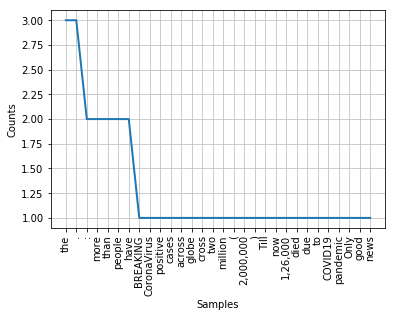

In [79]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [81]:
#Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{"hadn't", 'on', 'yours', 'those', 'during', 'not', "you're", 'itself', 'their', 'weren', 'myself', 'shan', 'some', 'there', 'we', 'do', 'off', 'same', 'mightn', 'in', 'more', 'these', 'hasn', "mightn't", "it's", 'from', 'had', 'as', 'each', 'than', "should've", 'you', 'just', 'down', 'so', 'of', "aren't", 've', 'haven', 'to', "that'll", 'under', 'most', 'once', 'both', 'nor', 'having', 'such', 'himself', 'm', "needn't", 'y', 'whom', 'why', 'is', 'didn', 'aren', 'against', 'what', 'does', 'doesn', "isn't", 'this', 'other', 'with', 'they', "you'll", 'up', 'how', 'won', 'further', "shouldn't", 'been', 'her', 'was', "didn't", 'too', 'own', 'can', 'hers', 'has', 'at', 'did', 'but', "couldn't", "haven't", 'me', 'above', 'the', 'i', 'an', 'will', 'few', "hasn't", 'your', 'now', 'ma', 'needn', 'wouldn', 'out', 'being', 'until', 'betwee

In [82]:
#Removing Stopwords
filtered_sent=[]
for w in tokenized_text:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['BREAKING: CoronaVirus positive cases across the globe cross two million (2,000,000).', 'Till now more than 1,26,000 people have died due to the COVID19 pandemic.', 'Only good news is that more than 484,000 people have recovered from the infection as well.', 'StayHome https://t.co/awDscDdL1B']
Filterd Sentence: ['BREAKING: CoronaVirus positive cases across the globe cross two million (2,000,000).', 'Till now more than 1,26,000 people have died due to the COVID19 pandemic.', 'Only good news is that more than 484,000 people have recovered from the infection as well.', 'StayHome https://t.co/awDscDdL1B']


In [83]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('wordnet')
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Filtered Sentence: ['BREAKING: CoronaVirus positive cases across the globe cross two million (2,000,000).', 'Till now more than 1,26,000 people have died due to the COVID19 pandemic.', 'Only good news is that more than 484,000 people have recovered from the infection as well.', 'StayHome https://t.co/awDscDdL1B']
Stemmed Sentence: ['breaking: coronavirus positive cases across the globe cross two million (2,000,000).', 'till now more than 1,26,000 people have died due to the covid19 pandemic.', 'only good news is that more than 484,000 people have recovered from the infection as well.', 'stayhome https://t.co/awdscddl1b']


In [84]:
#Lexicon Normalization
#performing stemming and Lemmatization
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()
for i in range(0,len(data)):
  word=data['text'][i]
  print("Lemmatized Word:",lem.lemmatize(str(word),"v"))
  print("Stemmed Word:",stem.stem(str(word)))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Lemmatized Word: Online training for 25,000 doctors to begin https://t.co/nXDWo6iuxy via  digital platform for covid19 training
Stemmed Word: online training for 25,000 doctors to begin https://t.co/nxdwo6iuxy via  digital platform for covid19 train
Lemmatized Word: Coronavirus: WhiteHouse projects 100,000 to 240,000 deaths in the US" Coronavirus https://t.co/f9q7bU3pif 
US COVID19 cases surpassed 175000 with more than 3400 fatalities.  
  
    

Stemmed Word: coronavirus: whitehouse projects 100,000 to 240,000 deaths in the us" coronavirus https://t.co/f9q7bu3pif 
us covid19 cases surpassed 175000 with more than 3400 fatalities.  
  
    

Lemmatized Word: Coronavirus | Three quasi-subspecies of virus in circulation in India, says ICMR: https://t.co/pI8he5dOKs
Stemmed Word: coronavirus | three quasi-subspecies of virus in circulati

Lemmatized Word:  Since every State is following the Guidelines of Supreme Court in releasing the old Prisoners during this CoronaVirusPandemic Situation.Why innocent Sant Shri Asaram Bapu Ji still behind the bars ?
CoronaRiskForPrisoners
Stemmed Word:  since every state is following the guidelines of supreme court in releasing the old prisoners during this coronaviruspandemic situation.why innocent sant shri asaram bapu ji still behind the bars ?
coronariskforprison
Lemmatized Word: In this period of crisis, We are with you.
Million's of  workers are ready to help in different districts of the states,
If anyone is suffering due to lockdown around you, contact the following helpline numbers.
LadengeAurJeetenge
COVID19 https://t.co/oKu5oRGiuf
Stemmed Word: in this period of crisis, we are with you.
million's of  workers are ready to help in different districts of the states,
if anyone is suffering due to lockdown around you, contact the following helpline numbers.
ladengeaurjeetenge
cov

Stemmed Word: 32 people were tested positive yesterday in delhi out of which 29 people had attended tablighi jamaat event in nizamuddin. a total of 700 possibly infected &amp; confirmed cases of covid19 are in different hospitals in delhi: health minister satyendar jain
Lemmatized Word: CoronaUpdates - 21 new Covid19 positive cases have been registered after 10PM last night, till today morning. Total cases are now 132 in Andhra Pradesh. APFightsCorona COVID19 https://t.co/1MISL5IUgc
Stemmed Word: coronaupdates - 21 new covid19 positive cases have been registered after 10pm last night, till today morning. total cases are now 132 in andhra pradesh. apfightscorona covid19 https://t.co/1misl5iugc
Lemmatized Word: Moron NizamuddinMarkaz was used as a Launchpad to spread biojihad BioTerrorism... In those 15 days they created human bombs equipped with coronavirus then spread all over India to spread it.. Mission accomplished.. TablighiJamatVirus Tablighijihadi https://t.co/M2M5cH0Uon
Stemmed 

Stemmed Word: desperate times call for strict measures!!
start cooperating with the government or else face the consequences of ourting yourself and other's life at risk!!
covid19 
coronavillains https://t.co/ugeost0puo
Lemmatized Word:  Stayhomestaysafe Message from Riddhi Ganjoo https://t.co/t1UW6tMlQl
Stemmed Word:  stayhomestaysafe message from riddhi ganjoo https://t.co/t1uw6tmlql
Lemmatized Word:  Stayhomestaysafe Message by Riddhi Ganjoo https://t.co/42pWjizgBY
Stemmed Word:  stayhomestaysafe message by riddhi ganjoo https://t.co/42pwjizgbi
Lemmatized Word: Would suggest whenever health workers go out to such areas, inform any one of these three, they could ensure such incidents don't happen.

_m

50 attack Asha worker on Covid_19-19 duty in Bengaluru; five arrested
COVID2019 https://t.co/g0JVSfN2EP
Stemmed Word: would suggest whenever health workers go out to such areas, inform any one of these three, they could ensure such incidents don't happen.

_m

50 attack asha worker on 

https://t.co/GWr9x5Acmo
Stemmed Word: coronavirus live: maharashtra tally more than doubles to 490 in 4 days; over 50% cases in mumbai
 https://t.co/pkqqyucgwp
download the toi app now:
https://t.co/gwr9x5acmo
Lemmatized Word:  Kool math to optimize use of covid19 testing kits: 
Take 16 sample drops in 1 mix. If it's -ve then in one shot you know everyone is good
Else
Take few drops from each sample &amp; make 2 mix of 8 samples each &amp; test these mixtures

Now continue ??? Binary search to save lives
Stemmed Word:  kool math to optimize use of covid19 testing kits: 
take 16 sample drops in 1 mix. if it's -ve then in one shot you know everyone is good
else
take few drops from each sample &amp; make 2 mix of 8 samples each &amp; test these mixtures

now continue ??? binary search to save l
Lemmatized Word: How East Asia is dealing with chinaoriginvirus ChinaVirus COVID2019 Indonesia: Poor Healthcare Facilities, Lack Of Transparency Malaysia: Glimmers Of Hope In Fight Against Corona

Stemmed Word: stop watching news channels all day, instead develop skills in lockdown period. ????æ?_?????????_?ª????_???ø? sundaythoughts sundaymorning coronaviruspandemic https://t.co/yd3gsoewpz
Lemmatized Word: Dera Sacha Sauda   ???? followers are ServingTheNation 

???? This is just becoz of Preachings of Revered Saint Dr  G, Dera Followers R Serving d country even in this Crisis due to  CoronavirusPandemic https://t.co/hvmz3zDKeq
Stemmed Word: dera sacha sauda   ???? followers are servingthenation 

???? this is just becoz of preachings of revered saint dr  g, dera followers r serving d country even in this crisis due to  coronaviruspandemic https://t.co/hvmz3zdkeq
Lemmatized Word:  joined tablighi strategy to fight COVID19 where is social distance? 
Surjewala may argued he has almost lost deposit in last election so he already facing social distance https://t.co/ujas48G9UZ
Stemmed Word:  joined tablighi strategy to fight covid19 where is social distance? 
surj

Lemmatized Word: First known transmission from a human to an animal. Tiger at New York's Bronx Zoo tests positive for coronavirus. More tigers and lions show symptoms. StayHomeStaySafe stayhome CautionYesPanicNo covid19 https://t.co/C78NflenxA
Stemmed Word: first known transmission from a human to an animal. tiger at new york's bronx zoo tests positive for coronavirus. more tigers and lions show symptoms. stayhomestaysafe stayhome cautionyespanicno covid19 https://t.co/c78nflenxa
Lemmatized Word: Even during this 21DaysLockDown your selfless, tireless and sleepless work definitely has to be noted, appreciated and recognised. We, the whole India respect you for this ???????????? JaiHind StayHomeStaySafe StayHomeIndia StayHomeSaveLives https://t.co/mgaC3j0CNc
Stemmed Word: even during this 21dayslockdown your selfless, tireless and sleepless work definitely has to be noted, appreciated and recognised. we, the whole india respect you for this ???????????? jaihind stayhomestaysafe 

Lemmatized Word: AngreziMedium - which had a theatrical release on 13 March 2020, but its theatrical run was cut short due to theatres shutting down due to COVID19Pandemic - has now released on digital platform... OFFICIAL announcement... CoronaVirus Covid_19 https://t.co/6WJBZFPnEV
Stemmed Word: angrezimedium - which had a theatrical release on 13 march 2020, but its theatrical run was cut short due to theatres shutting down due to covid19pandemic - has now released on digital platform... official announcement... coronavirus covid_19 https://t.co/6wjbzfpnev
Lemmatized Word: We are not mistaken when we ask for more hospitals and less war.
covid coronavirus virus quarantine lockdownextension https://t.co/E9vXuuwla1
Stemmed Word: we are not mistaken when we ask for more hospitals and less war.
covid coronavirus virus quarantine lockdownextension https://t.co/e9vxuuwla1
Lemmatized Word: _tina your district achieving pride, coronavirus. Keep it up mam..
Stemmed Word: _tina your district ac

Stemmed Word: us coronavirus death toll jumps to over 15,000: johnshopkins tally. the tally leapt to 15,774 dead from 432,596 cases, as the us struggles to combat the spread of virus.
Lemmatized Word: Full story in this link please click on this link ????
https://t.co/19QuUbRI0r

amreading AarogyaSetuApp ad CoronavirusOutbreak Lockdownextention YouTubeVideo YouTube??§??¯?ý YouTubeOriginals YouTubers4NHSHeroes https://t.co/IHttggXh5A
Stemmed Word: full story in this link please click on this link ????
https://t.co/19quubri0r

amreading aarogyasetuapp ad coronavirusoutbreak lockdownextention youtubevideo youtube??§??¯?ý youtubeoriginals youtubers4nhsheroes https://t.co/ihttggxh5a
Lemmatized Word: "Coronavirus: WHO marks 100 days since China alerted to first COVID-19 cases" Coronavirus https://t.co/AHCHJVSyqH
WorldFightsCoronavirus WHOLiedPeopleDied WuhanVirus_BioTerror WarAgainstHumanity
Stemmed Word: "coronavirus: who marks 100 days since china alerted to first covid-19 cases" c

Stemmed Word: telangana woman rides 1400 km on scooty to bring back son home |  razia begum | lock down | j dreams 
https://t.co/ry1mdhrrro

raziyabegum stayhome staysafe withme with johnny_jdreams johnny jdreams dreams lockdown corona covid_19 https://t.co/pjerdombpq
Lemmatized Word: Feed the Daily Wager Update :
.
Food served : 35 people &amp; 8 families.
.
Areas : Santa Cruz, Calangute , Arpora and Mapusa.
.
Date : 2nd.April.2020 || Thursday
.
Campaign Link : https://t.co/UdE1EaXPhz
.
goafightscovid19  IndiaFightsCoronavirus covid19 ihelpfoundationgoa ???????? https://t.co/tlQn9PRyWI
Stemmed Word: feed the daily wager update :
.
food served : 35 people &amp; 8 families.
.
areas : santa cruz, calangute , arpora and mapusa.
.
date : 2nd.april.2020 || thursday
.
campaign link : https://t.co/ude1eaxphz
.
goafightscovid19  indiafightscoronavirus covid19 ihelpfoundationgoa ???????? https://t.co/tlqn9prywi
Lemmatized Word: I wel come Hon CM's decision to increase lock-down period till 30th

Stemmed Word:   same to u angad bhai and neha parjai

by yo sunny
stayhomestaysafe
jaihind
Lemmatized Word: Pakistan begging around for PPE KITS and funds to fight against corona virus outbreak.

 Who is financing these terrorist  ? 

terrorist army navy airforce india pakistan un war corona coronavirus lockdown curfew https://t.co/VEtU6WPS23
Stemmed Word: pakistan begging around for ppe kits and funds to fight against corona virus outbreak.

 who is financing these terrorist  ? 

terrorist army navy airforce india pakistan un war corona coronavirus lockdown curfew https://t.co/vetu6wps23
Lemmatized Word:  Pakistan begging around for PPE KITS and funds to fight against corona virus outbreak.

 Who is financing these terrorist  ? 

terrorist army navy airforce india pakistan un war corona coronavirus lockdown curfew https://t.co/ehiS8ky6vD
Stemmed Word:  pakistan begging around for ppe kits and funds to fight against corona virus outbreak.

 who is financing these terrorist  ? 

terrori

Stemmed Word: .  (mha) issues national directives for covid19 management. 

???ú wearing of face cover is compulsory in all public places, workplaces. 

????spitting in public places shall be punishable with fine. https://t.co/zrezuysgul
Lemmatized Word: Watch chef and Author  talk about his favorite masala and his journey. The Indian kitchen is incomplete without the masala dabba or the spice box that comprises a world of flavours, colours and textures. CoronavirusPandemic masaladabba receipe  https://t.co/V6qmNMXvbo
Stemmed Word: watch chef and author  talk about his favorite masala and his journey. the indian kitchen is incomplete without the masala dabba or the spice box that comprises a world of flavours, colours and textures. coronaviruspandemic masaladabba receipe  https://t.co/v6qmnmxvbo
Lemmatized Word: Is muscle pain a symptom of COVID-19? Just asking for an acquaintance. 
 _INDIA coronavirus IndiaFightCorona lockdown
Stemmed Word: is muscle pain a symptom of covid-19? just a

In [85]:
#Part-of-Speech(POS) tagging 
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokenized_word)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('BREAKING', 'NN'),
 (':', ':'),
 ('CoronaVirus', 'NNP'),
 ('positive', 'JJ'),
 ('cases', 'NNS'),
 ('across', 'IN'),
 ('the', 'DT'),
 ('globe', 'NN'),
 ('cross', 'NN'),
 ('two', 'CD'),
 ('million', 'CD'),
 ('(', '('),
 ('2,000,000', 'CD'),
 (')', ')'),
 ('.', '.'),
 ('Till', 'VB'),
 ('now', 'RB'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('1,26,000', 'CD'),
 ('people', 'NNS'),
 ('have', 'VBP'),
 ('died', 'VBN'),
 ('due', 'JJ'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('COVID19', 'NNP'),
 ('pandemic', 'NN'),
 ('.', '.'),
 ('Only', 'RB'),
 ('good', 'JJ'),
 ('news', 'NN'),
 ('is', 'VBZ'),
 ('that', 'IN'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('484,000', 'CD'),
 ('people', 'NNS'),
 ('have', 'VBP'),
 ('recovered', 'VBN'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('infection', 'NN'),
 ('as', 'RB'),
 ('well', 'RB'),
 ('.', '.'),
 ('StayHome', 'NNP'),
 ('https', 'NN'),
 (':', ':'),
 ('//t.co/awDscDdL1B', 'NN')]

In [93]:
#Feature Generation Using Bag of Words

df=pd.read_csv('data_after_analysis.csv',encoding='latin-1')
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Analysis'] = labelencoder.fit_transform(df['Analysis'])

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['text'])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Analysis'], test_size=0.3, random_state=1)

In [96]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.58
